<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span></li><li><span><a href="#Модель-без-учёта-дисбаланса" data-toc-modified-id="Модель-без-учёта-дисбаланса-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель без учёта дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Построим-модели-без-учета-дисбаланса" data-toc-modified-id="Построим-модели-без-учета-дисбаланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Построим модели без учета дисбаланса</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li></ul></li><li><span><a href="#Балансировка-данных" data-toc-modified-id="Балансировка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Балансировка данных</a></span><ul class="toc-item"><li><span><a href="#Логистическая-модель-с-учетом-балансировки" data-toc-modified-id="Логистическая-модель-с-учетом-балансировки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая модель с учетом балансировки</a></span></li><li><span><a href="#Модель-решающего-дерева-с-учетом-балансировки" data-toc-modified-id="Модель-решающего-дерева-с-учетом-балансировки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель решающего дерева с учетом балансировки</a></span></li><li><span><a href="#Модель-случайного-леса-с-учетом-балансировки" data-toc-modified-id="Модель-случайного-леса-с-учетом-балансировки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного леса с учетом балансировки</a></span></li><li><span><a href="#Финальное-тестирование-модели" data-toc-modified-id="Финальное-тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Финальное тестирование модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта
Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

# Инструкция по выполнению проекта:
- Загрузите и подготовьте данные. Поясните порядок действий.
- Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
- Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
- Проведите финальное тестирование.

# Описание данных

Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

## Изучение и подготовка данных

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score 

In [4]:
# Код для считывания данных
data_сhurn = pd.read_csv('users_сhurn.csv')
data_сhurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# Удалим столбец 'RowNumber', так как он дублирует индексы
data_сhurn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data_сhurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [7]:
# Проверим данные на дубликаты по столбцу с уникальным индексом клиента
data_сhurn[data_сhurn['CustomerId'].duplicated() == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


В данных каждый клиент представлен один раз. Видим, что есть пропуски в столбце 'Tenure' (сколько лет человек является клиентом банка)

In [8]:
# Поиск уникальных значений в столбце 'Tenure'
data_сhurn['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
data_сhurn.query('Tenure == "Nan"')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Была идея, что пропуски в столбце 'Tenure' у людей, кто является клиентом банка менее года, но поиск уникальных значений показал значение 0. Далее, я подумал, что пропуски у клиентов, которые пользуются банком уже более 10 лет, но, в таком случае, возраст этих клиентов был бы более 28 лет, а в наших данных есть клиенты и младше. Больше закономерностей и причин пропусков я не вижу, удалим значения с пропусками без зазрения совести!

In [10]:
data_сhurn = data_сhurn.query('Tenure != "Nan"')
data_сhurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 13 columns):
CustomerId         9091 non-null int64
Surname            9091 non-null object
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 994.3+ KB


In [11]:
# Выполним прямое кодирование таблицы с обходом дамми-ловушки
data_сhurn_ohe = pd.get_dummies(data_сhurn, drop_first=True)
data_сhurn_ohe

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,0,0,0,0,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,0,1,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,0,0,0,0,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,0,0,0,0,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,800,29,2.0,0.00,2,0,0,167773.55,0,...,0,0,0,0,0,0,0,0,0,0
9995,15606229,771,39,5.0,0.00,2,1,0,96270.64,0,...,0,0,0,0,0,0,0,0,0,1
9996,15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,...,0,0,0,0,0,0,0,0,0,1
9997,15584532,709,36,7.0,0.00,1,0,1,42085.58,1,...,0,0,0,0,0,0,0,0,0,0


Разделим исходные данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1 (60%, 20% и 20%). Для этого сначала разобьем на тестовую (data_ub_test) и общую выборки (data_ub_train_valid) с помощью train_test_split с параметром test_size=0.20. Затем data_ub_train_valid разделим еще раз на тренировочную (data_ub_train) и валидационную (data_ub_valid) выборки с помощью train_test_split с параметром test_size=0.25. Тут выбирается 0.25 так как от первоначальных данных (data_ub) это и есть 20%.

In [12]:
# Выделим переменные признаки и признак, который нужно предсказать
features = data_сhurn_ohe.drop('Exited', axis=1) # извлеките признаки
target = data_сhurn_ohe['Exited'] # извлеките целевой признак

In [13]:
# Отделим тестовую выборку (20%) от первоначальных данных
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)

In [14]:
# Отделим валидационную выборку (20%) от первоначальных данных
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=12345)

In [15]:
# Создание словаря
samples = {'features_train': features_train, 'target_train': target_train, 'features_valid': features_valid,
         'target_valid': target_valid, 'features_test': features_test, 'target_test': target_test}
print('Размеры выборок')
# Вывод каждой из шести выборки
for key, value in samples.items():
    print(key, ':', value.shape)

Размеры выборок
features_train : (5454, 2798)
target_train : (5454,)
features_valid : (1818, 2798)
target_valid : (1818,)
features_test : (1819, 2798)
target_test : (1819,)


В наших данных есть столбцы с численными значениями имеющие разный масшаб. Проведем масштабирование колонок: 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'.

In [16]:
# Масштабируем признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

## Модель без учёта дисбаланса

### Построим модели без учета дисбаланса

In [17]:
# Посмотрим на долю правильных ответов в модели решающего дерева
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train) # обучение модели
predicted_valid = model.predict(features_valid) # получение предсказания модели
accuracy_valid = accuracy_score(target_valid, predicted_valid) # получение доли правильных ответов

print('Доля правильных ответов:', accuracy_valid) 

Доля правильных ответов: 0.8212321232123212


In [18]:
# Еще посмотрим на долю правильных ответов в модели логистической регрессии
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train) # обучение модели
predicted_valid = model.predict(features_valid) # получение предсказания модели
accuracy_valid = accuracy_score(target_valid, predicted_valid) # получение доли правильных ответов

print('Доля правильных ответов:', accuracy_valid) 

Доля правильных ответов: 0.7986798679867987


/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Примерно 80 провентов ответов совпадает, проверим данные на баланс классов. Проверим адекватность модели.

### Исследование баланса классов

0    0.796062
1    0.203938
Name: Exited, dtype: float64


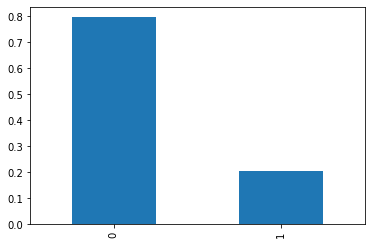

In [19]:
# Проверим, как часто в целевом признаке встречается класс «1» или «0»
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

0    0.825633
1    0.174367
dtype: float64
F1-мера: 0.5241581259150805


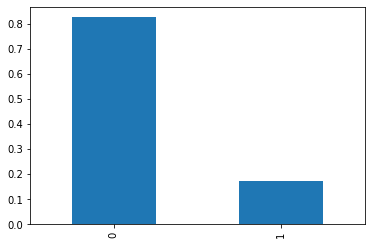

In [20]:
# Проанализируем частоты классов в результатах предсказаний решающего дерева 
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train) # обучение модели
# Преобразуем результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
# Подсчет классов и перевод в относительные величины
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 
print('F1-мера:', f1_score(target_valid, predicted_valid))

0    1.0
dtype: float64
F1-мера 0.0


/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


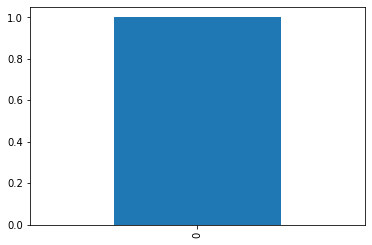

In [21]:
# Проанализируем частоты классов в результатах предсказаний логистической регрессии
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train) # обучение модели
# Преобразуем результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
# Подсчет классов и перевод в относительные величины
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
print('F1-мера', f1_score(target_valid, predicted_valid))

In [22]:
# Создадим константную модель, где все значения будут равны 0 и сравним точность предсказывания по нашим данным
target_pred_constant = pd.Series(0 for i in range(len(target)))
print(accuracy_score(target, target_pred_constant)) 

0.7960620393796062


В результате константная модель предсказывает так же как модель решающего дерева и логистической регрессии, нужно сбалансировать данные.

## Балансировка данных 

0    0.655116
1    0.344884
dtype: float64
F1-мера 0.4914400805639476


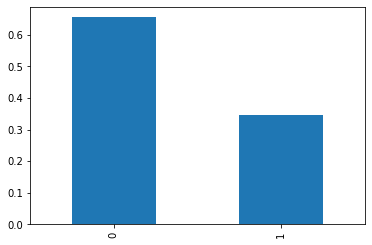

In [23]:
# Проанализируем частоты классов в результатах предсказаний логистической регрессии
# с условием балансировки классов
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train) # обучение модели
# Преобразуем результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
# Подсчет классов и перевод в относительные величины
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
print('F1-мера', f1_score(target_valid, predicted_valid))

Ну хотя бы теперь логистическая регрессия предсказывает и единицы=)

Помним, что в целевом признаке класс 0 всетречается в 4 раза чаще, поэтому применим метод увеличения выборки класса 1.

In [24]:
# Создадим функцию для увеличения обучающей выборки класса 1 в несколько раз
def upsample(features, target, repeat):
    # Разделилим обучающую выборку на отрицательные и положительные объекты.
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Объединим таблицы
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # Перемешаем данные
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [25]:
# Применим функцию для увеличения выборки класса 1 в 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

### Логистическая модель с учетом балансировки

In [26]:
# Посмотри на F1-меру в модели логистической регресии с учетом балансировки данных
model = LogisticRegression(random_state=12345, solver='liblinear')
# Обучим модель на увеличенных выборках
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 

print('F1-мера', f1_score(target_valid, predicted_valid))

F1-мера 0.3351648351648352


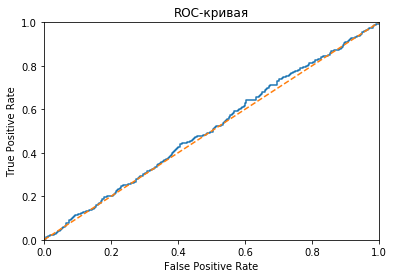

0.5100106881030875


In [27]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

F-1 мера очень низкая, а ROC-кривая модели схожа с кривой случайной модели, рассмотрим модель решающего дерева.

### Модель решающего дерева с учетом балансировки

In [28]:
best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # инициализируем модель DecisionTreeClassifier с параметром random_state=12345 и max_depth=depth
    model.fit(features_upsampled, target_upsampled) # обучим модель на новой тренировочной выборке
    predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_tree_result:
        best_tree_model = model
        best_tree_result = f1
        best_tree_depth = depth

print("F1-мера наилучшей модели на валидационной выборке:", best_tree_result,
      "Глубина дерева:", best_tree_depth)

F1-мера наилучшей модели на валидационной выборке: 0.5661310259579728 Глубина дерева: 14


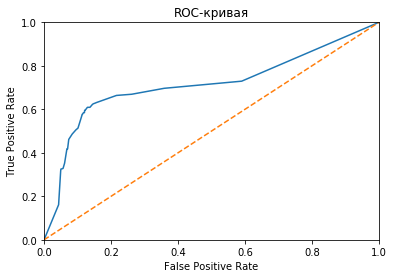

0.7149842312845293


In [29]:
model = DecisionTreeClassifier(random_state=12345, max_depth=14)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

Модель решающего дерева показала результаты намного лучше логистической регрессии, F1-мера = 0,56, но она все еще меньше 0,59, заявленной в задании. Рассмотрим модель случайного леса.

### Модель случайного леса с учетом балансировки

In [30]:
best_forest_model = None
best_forest_result = 0
best_forest_est = 0
best_forest_depth = 0
for est in range(21, 41, 2):
    for depth in range (31, 51, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # инициализируем модель RandomForestClassifier с параметрами random_state=12345, 
        # n_estimators=est и max_depth=depth
        model.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_forest_result:
            best_forest_model = model
            best_forest_result = f1
            best_forest_est = est
            best_forest_depth = depth

print("F1-мера наилучшей модели на валидационной выборке:", best_forest_result,
      "Количество деревьев:", best_forest_est, "Максимальная глубина:", best_forest_depth)

F1-мера наилучшей модели на валидационной выборке: 0.5968586387434556 Количество деревьев: 27 Максимальная глубина: 47


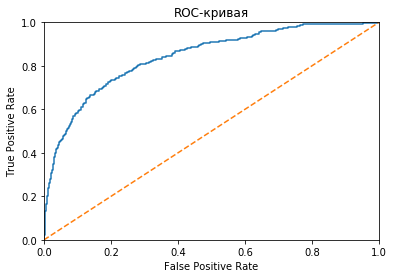

0.8419703743846815


In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=27, max_depth=47)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

Ура! Получили модель с F1-мерой > 0,59 и AUC-ROC этой модели > 0,84!

### Финальное тестирование модели

In [32]:
model = RandomForestClassifier(random_state=12345, n_estimators=27, max_depth=47)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_test)
print('F1-мера тестовой выборки', f1_score(target_test, predicted_valid))

F1-мера тестовой выборки 0.6065989847715735


Все так же больше 0,59=)

## Выводы
- Сделали предобработку и масштабирование данных
- В ходе работы мы разделили данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1
- Построили модель логистической регрессии и модель решающего дерева на полученных данных
- Исследовали баланс классов и провели балансировку данных путем увеличение выборки класса 1
- Исследовали различные модели с учетом балансировки данных, опираясь на F1-меру и ROC-кривую
- Моделью, которая удовлетворяет условию: F1-мера > 0,59, является модель случайного леса с количеством деревьев=27 и глубиной=47